<a href="https://colab.research.google.com/github/adimyth/legal_language_model/blob/master/notebooks/lesson_4_tabular(ltfs_hackathon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!mkdir data

In [0]:
!unzip -q /gdrive/My\ Drive/train_aox2Jxw.zip -d data

In [0]:
!cp /gdrive/My\ Drive/test_bqCt9Pv.csv data/test.csv

## Importing libraries

In [0]:
import pandas as pd
from fastai import *
from fastai.tabular import *
from pathlib import Path
import numpy as np

In [0]:
data_dir = Path('data')
epochs = 5
batch_size = 64

## Exploring Data

In [0]:
train_df = pd.read_csv(data_dir/'train.csv')

In [0]:
test_df = pd.read_csv(data_dir/'test.csv')

In [10]:
test_df.shape

(112392, 40)

In [11]:
train_df.shape

(233154, 41)

In [12]:
train_df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [13]:
for col in train_df.columns:
  print(f'Column: {col}  Unique Values: {train_df[col].nunique()}\n')

Column: UniqueID  Unique Values: 233154

Column: disbursed_amount  Unique Values: 24565

Column: asset_cost  Unique Values: 46252

Column: ltv  Unique Values: 6579

Column: branch_id  Unique Values: 82

Column: supplier_id  Unique Values: 2953

Column: manufacturer_id  Unique Values: 11

Column: Current_pincode_ID  Unique Values: 6698

Column: Date.of.Birth  Unique Values: 15433

Column: Employment.Type  Unique Values: 2

Column: DisbursalDate  Unique Values: 84

Column: State_ID  Unique Values: 22

Column: Employee_code_ID  Unique Values: 3270

Column: MobileNo_Avl_Flag  Unique Values: 1

Column: Aadhar_flag  Unique Values: 2

Column: PAN_flag  Unique Values: 2

Column: VoterID_flag  Unique Values: 2

Column: Driving_flag  Unique Values: 2

Column: Passport_flag  Unique Values: 2

Column: PERFORM_CNS.SCORE  Unique Values: 573

Column: PERFORM_CNS.SCORE.DESCRIPTION  Unique Values: 20

Column: PRI.NO.OF.ACCTS  Unique Values: 108

Column: PRI.ACTIVE.ACCTS  Unique Values: 40

Column: PRI.

## Handling Date Columns

### Train

In [0]:
train_df['dob_year'] = train_df['Date.of.Birth'].str.split('-')
train_df.loc[:, 'dob_year'] = train_df.dob_year.map(lambda x: x[2])

In [0]:
train_df['disbursal_year'] = train_df['DisbursalDate'].str.split('-')
train_df.loc[:, 'disbursal_year'] = train_df.disbursal_year.map(lambda x: x[2])
train_df.loc[:, 'disbursal_month'] = train_df.disbursal_year.map(lambda x: x[1])

In [0]:
train_df['disbursal_year'] = pd.to_numeric(train_df['disbursal_year'])
train_df['disbursal_month'] = pd.to_numeric(train_df['disbursal_month'])

In [0]:
interim = train_df['AVERAGE.ACCT.AGE'].str.split(' ')
train_df['acct_age_yrs'] = interim.map(lambda x:int(x[0][:-3]))
train_df['acct_age_months'] = interim.map(lambda x:int(x[1][:-3]))

In [0]:
interim = train_df['CREDIT.HISTORY.LENGTH'].str.split(' ')
train_df['credit_hist_yrs'] = interim.map(lambda x:int(x[0][:-3]))
train_df['credit_hist_months'] = interim.map(lambda x:int(x[1][:-3]))

### Test

In [0]:
test_df['dob_year'] = test_df['Date.of.Birth'].str.split('-')
test_df.loc[:, 'dob_year'] = test_df.dob_year.map(lambda x: x[2])

In [0]:
test_df['disbursal_year'] = test_df['DisbursalDate'].str.split('-')
test_df.loc[:, 'disbursal_year'] = test_df.disbursal_year.map(lambda x: x[2])
test_df.loc[:, 'disbursal_month'] = test_df.disbursal_year.map(lambda x: x[1])

In [0]:
test_df['disbursal_year'] = pd.to_numeric(test_df['disbursal_year'])
test_df['disbursal_month'] = pd.to_numeric(test_df['disbursal_month'])

In [0]:
interim = test_df['AVERAGE.ACCT.AGE'].str.split(' ')
test_df['acct_age_yrs'] = interim.map(lambda x:int(x[0][:-3]))
test_df['acct_age_months'] = interim.map(lambda x:int(x[1][:-3]))

In [0]:
interim = train_df['CREDIT.HISTORY.LENGTH'].str.split(' ')
test_df['credit_hist_yrs'] = interim.map(lambda x:int(x[0][:-3]))
test_df['credit_hist_months'] = interim.map(lambda x:int(x[1][:-3]))

## Tabular DataBunch

In [0]:
dep_var = 'loan_default'

In [0]:
cat_cols = ['branch_id', 'manufacturer_id', 'Employment.Type', 'State_ID', 
            'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
            'PERFORM_CNS.SCORE.DESCRIPTION', 'Driving_flag', 'Passport_flag', 
            'dob_year', 'disbursal_month']

In [0]:
num_cols = ['SEC.OVERDUE.ACCTS', 
            'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT', 'PRIMARY.INSTAL.AMT', 
            'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 
            'NO.OF_INQUIRIES', 'disbursed_amount', 'PRI.DISBURSED.AMOUNT', 
            'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 
            'SEC.ACTIVE.ACCTS', 'PERFORM_CNS.SCORE', 
            'SEC.NO.OF.ACCTS', 'UniqueID', 'PRI.ACTIVE.ACCTS', 'Current_pincode_ID', 
            'supplier_id', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'ltv', 
            'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'PRI.NO.OF.ACCTS', 
            'PRI.SANCTIONED.AMOUNT', 
            'Employee_code_ID', 'asset_cost', 'disbursal_year', 'acct_age_yrs', 
            'acct_age_months', 'credit_hist_yrs', 'credit_hist_months']

In [0]:
procs = [FillMissing, Categorify, Normalize]

In [0]:
valid = TabularList.from_df(train_df.iloc[186523:233154].copy(), path=data_dir, cat_names=cat_cols, cont_names=num_cols)


In [0]:
valid = TabularList.from_df(test_df, path=data_dir, cat_names=cat_cols, cont_names=num_cols)

In [0]:
data = (TabularList.from_df(train_df, path=data_dir, cat_names=cat_cols, cont_names=num_cols, procs=procs)
        .split_by_idx(list(range(186523, 233154)))
        .label_from_df(cols=dep_var)
        .add_test(valid)
        .databunch(bs=batch_size))

In [31]:
data.show_batch(rows=10)

branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,PERFORM_CNS.SCORE.DESCRIPTION,Driving_flag,Passport_flag,dob_year,disbursal_month,SEC.OVERDUE.ACCTS,SEC.DISBURSED.AMOUNT,SEC.INSTAL.AMT,PRIMARY.INSTAL.AMT,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,NO.OF_INQUIRIES,disbursed_amount,PRI.DISBURSED.AMOUNT,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,SEC.ACTIVE.ACCTS,PERFORM_CNS.SCORE,SEC.NO.OF.ACCTS,UniqueID,PRI.ACTIVE.ACCTS,Current_pincode_ID,supplier_id,NEW.ACCTS.IN.LAST.SIX.MONTHS,ltv,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,PRI.NO.OF.ACCTS,PRI.SANCTIONED.AMOUNT,Employee_code_ID,asset_cost,disbursal_year,acct_age_yrs,acct_age_months,credit_hist_yrs,credit_hist_months,target
5,86,Salaried,9,1,1,0,1,J-High Risk,0,0,92,8,-0.0665,-0.0387,-0.0199,-0.0616,-0.0313,-0.0391,-0.2937,-1.0783,-0.0390,-0.2856,-0.0730,-0.0875,0.7131,-0.0950,-1.5756,0.4991,-0.0357,-0.4264,-0.3998,-0.8927,-0.2526,-0.0810,-0.0393,-0.4787,-0.5764,0.0000,2.1467,1.4902,1.2599,1.8266,0
152,86,Self employed,3,1,1,1,0,No Bureau History Available,0,0,94,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,-0.2937,0.3801,-0.0834,-0.2856,-0.1721,-0.0875,-0.8554,-0.0950,0.5825,-0.5343,0.7070,1.0168,-0.3998,0.3456,-0.2526,-0.4652,-0.0837,-0.5316,0.0292,0.0000,-0.4530,-0.7355,-0.5049,-0.7060,1
34,120,Self employed,6,1,1,0,0,No Bureau History Available,0,0,71,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,1.1285,0.0979,-0.0834,-0.2856,-0.1721,-0.0875,-0.8554,-0.0950,0.5751,-0.5343,-1.0962,-0.9039,-0.3998,0.5411,-0.2526,-0.4652,-0.0837,0.3743,-0.3436,0.0000,-0.4530,-0.7355,-0.5049,-0.7060,1
18,86,Self employed,4,1,1,0,0,No Bureau History Available,0,0,80,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,-0.2937,0.4940,-0.0834,-0.2856,-0.1721,-0.0875,-0.8554,-0.0950,1.5281,-0.5343,-0.3222,0.9462,-0.3998,1.3154,-0.2526,-0.4652,-0.0837,0.2683,-0.3979,0.0000,-0.4530,-0.7355,-0.5049,-0.7060,1
3,51,Salaried,15,1,1,0,0,E-Low Risk,0,0,96,8,-0.0665,-0.0387,-0.0199,0.0658,-0.0313,-0.0391,-0.2937,-0.3908,0.0914,-0.2856,0.2680,-0.0875,1.1916,-0.0950,1.7298,1.0159,-1.2684,-0.3726,2.7628,-0.5104,-0.2526,0.3032,0.0975,0.4626,-0.0889,0.0000,-0.4530,1.2120,-0.0637,0.7010,0
1,49,Self employed,3,1,0,0,1,A-Very Low Risk,0,0,77,8,-0.0665,-0.0387,-0.0199,-0.0597,-0.0313,-0.0391,-0.2937,0.6607,-0.0834,-0.2856,-0.1721,-0.0875,1.6140,-0.0950,0.2574,-0.5343,0.7325,0.6681,-0.3998,-1.0987,-0.2526,-0.2731,-0.0837,-1.6304,1.5522,0.0000,-0.4530,2.0466,-0.5049,2.1080,0
3,45,Salaried,1,1,1,0,0,B-Very Low Risk,0,0,91,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,-0.2937,-1.0187,0.0001,-0.2856,-0.0075,-0.0875,1.4633,-0.0950,-0.9649,1.0159,-1.5224,-0.9527,-0.3998,-0.5069,-0.2526,0.1111,-0.0004,-0.2519,-0.7266,0.0000,-0.4530,1.7684,-0.0637,0.9824,0
20,86,Salaried,5,1,1,1,0,F-Low Risk,0,0,82,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,-0.2937,-0.2678,0.0702,-0.2856,-0.1270,-0.0875,1.0793,-0.0950,0.1832,-0.0176,1.3408,0.2463,-0.3998,0.5872,-0.2526,-0.2731,0.0701,-1.0722,-0.5835,0.0000,3.8799,1.4902,1.7011,1.5452,0
67,86,Salaried,6,1,1,0,0,No Bureau History Available,0,0,75,8,-0.0665,-0.0387,-0.0199,-0.0786,-0.0313,-0.0391,-0.2937,-0.3824,-0.0834,-0.2856,-0.1721,-0.0875,-0.8554,-0.0950,1.4922,-0.5343,-0.8627,0.7538,-0.3998,0.8966,-0.2526,-0.4652,-0.0837,-0.6281,-0.8656,0.0000,-0.4530,-0.7355,-0.5049,-0.7060,0
135,45,Self employed,4,1,1,0,0,M-Very High Risk,0,0,81,8,-0.0665,0.0153,-0.0199,-0.0786,-0.0313,0.0147,-0.2937,0.4516,0.7627,3.3294,1.0480,2.9678,0.0307,1.4920,0.1600,0.4991,-0.7333,-1.0941,-0.3998,0.3838,-0.2526,-0.0810,0.7634,1.3223,0.1233,0.0000,1.2801,1.4902,0.8187,1.5452,0


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy])

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


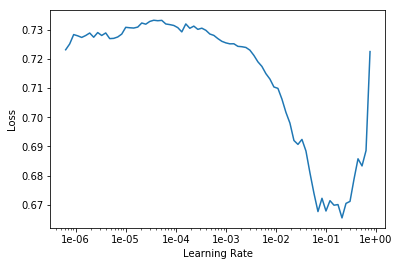

In [35]:
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(epochs, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.498012,0.513013,0.774442,01:03
1,0.495174,0.512360,0.774485,01:02
2,0.506240,0.513049,0.772984,01:03
3,0.480830,0.529869,0.773327,01:02
4,0.485442,0.534232,0.770796,01:02


## Testing

In [68]:
learn.predict(data.test_ds)

KeyError: ignored